# Sentiment Analysis on IMDB Movie Reviews

Work individually on this notebook.

Submitted by: Vedika Srivastava


**Prompt:**

> Describe the IMDB dataset.

Response: 

GitHub Copilot: The IMDB dataset is a large dataset of movie reviews for natural language processing. It contains 50,000 movie reviews that are split into 25,000 for training and 25,000 for testing. Each review is labeled as either positive or negative. The dataset is commonly used for sentiment analysis and text classification tasks.

**Prompt:**

> Write the python code to import the IMDB dataset.

Note that Copilot might not include all the necessry dependent packages. You 
may have to add them manually.

Also, if it's a package you don't have in your environment yet, you can open
the integrated terminal window, make sure to activate the same environment, 
and then install the package.

**Response:**


In [2]:
# GitHub Copilot: Here's the Python code to import the IMDB dataset using Keras:

from keras.datasets import imdb

# Load the dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

#This code uses the `imdb.load_data()` function from Keras to load the dataset. 
#The `num_words` parameter specifies the maximum number of words to include in the dataset, based on word frequency. 
#In this case, we're limiting the dataset to the top 10,000 most frequently occurring words. The dataset is split into training and testing sets, each with their own data and labels.

You might want to ask some questions about the dataset. For example, you might ask:

> what are the labels for the imdb dataset?

GitHub Copilot: The labels for the IMDB dataset are binary, either 0 or 1, where 0 represents a negative review and 1 represents a positive review.

> what is the form of the training data?

GitHub Copilot: In the `genai_imdb_vedikas.ipynb` notebook, the training data is loaded using the `imdb.load_data()` function from Keras. The training data is a list of 25,000 movie reviews, where each review is represented as a list of integers. Each integer represents a word in the review, and the integer value corresponds to the index of the word in a dictionary of the top 10,000 most frequently occurring words in the dataset. 

So the form of the training data is a list of 25,000 lists, where each inner list represents a movie review and is a sequence of integers.

> what are the words used in the training data?

GitHub Copilot: The words used in the training data are the top 10,000 most frequently occurring words in the IMDB dataset. The integer values in the training data correspond to the index of each word in this dictionary. However, the actual words themselves are not stored in the dataset.



For the last prompt, I got example python code, which also duplicated the
dataset loading, so I just deleted the duplicate code.

Note that the dataset is already processed, so the records are lists of integers.

In [4]:
from keras.datasets import imdb
word_index = imdb.get_word_index()

# Reverse the word index to map integers to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decode the first movie review in the training data
decoded_review = ' '.join([reverse_word_index.get(i - 3, '\n') for i in train_data[0]])

# Print the decoded review
print(decoded_review)


 this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert 
 is an amazing actor and now the same being director 
 father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for 
 and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also 
 to the two little boy's that played the 
 of norman and paul they were just brilliant children are often left out of the 
 list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

Now let understand the word index a little bit more. Try a prompt like:

> What's a good way to visualize the word index?

GitHub Copilot: One way to visualize the word index is to create a word cloud, where the size of each word corresponds to its frequency in the dataset. Here's the Python code to create a word cloud from the IMDB dataset:

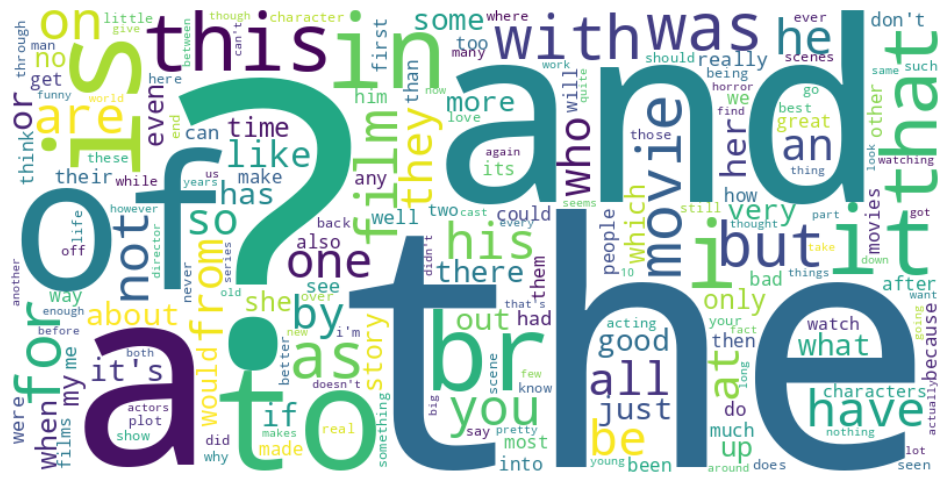

In [7]:
from keras.datasets import imdb
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Get the word index dictionary
word_index = imdb.get_word_index()

# Reverse the word index to map integers to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Create a dictionary of word frequencies
word_freq = {}
for sequence in train_data:
    for index in sequence:
        word = reverse_word_index.get(index - 3, '?')
        word_freq[word] = word_freq.get(word, 0) + 1

# Create a word cloud from the word frequency dictionary
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Prompt:**

> How do you create a word cloud from the word index, where the font size is proportional to the number of occurences of the word?

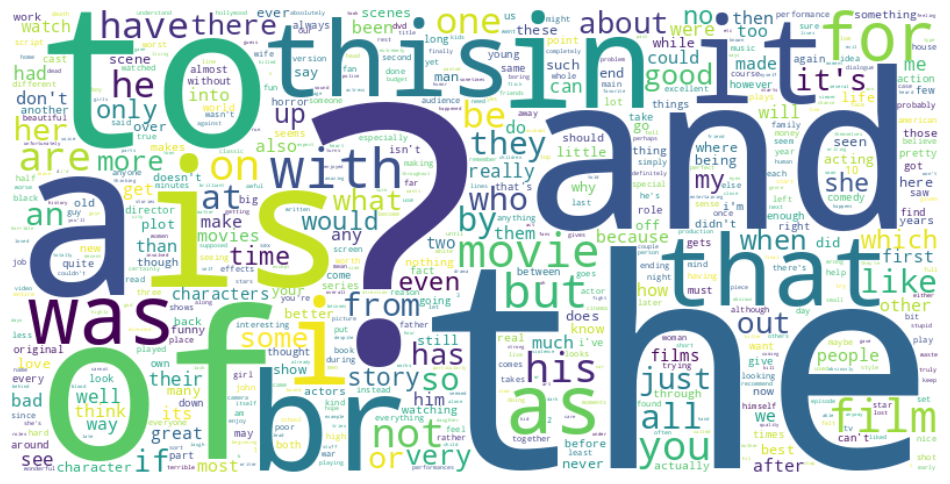

In [9]:
# Create a word cloud from the word frequency dictionary
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=10000, prefer_horizontal=1.0, relative_scaling=0.5).generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

It's clear that the most common words are ones that are not in the word index
(represented by '?') and stop words. So, let's remove those and try again.

> Remove stop words and punctuation

Note that here again, Copilot didn't include the necessary packages, so I had
to add them manually, as well as download the stop words. I just requested that
with the promp:

> download the stop words

In [12]:
from nltk.corpus import stopwords
import string

# Define the stop words and punctuation to remove
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Create a dictionary of word frequencies for the filtered words
word_freq_filtered = {}
for sequence in train_data:
    for index in sequence:
        word = reverse_word_index.get(index - 3, '?')
        if word not in stop_words and word not in punctuation:
            word_freq_filtered[word] = word_freq_filtered.get(word, 0) + 1

> now created a word cloud from the filtered words

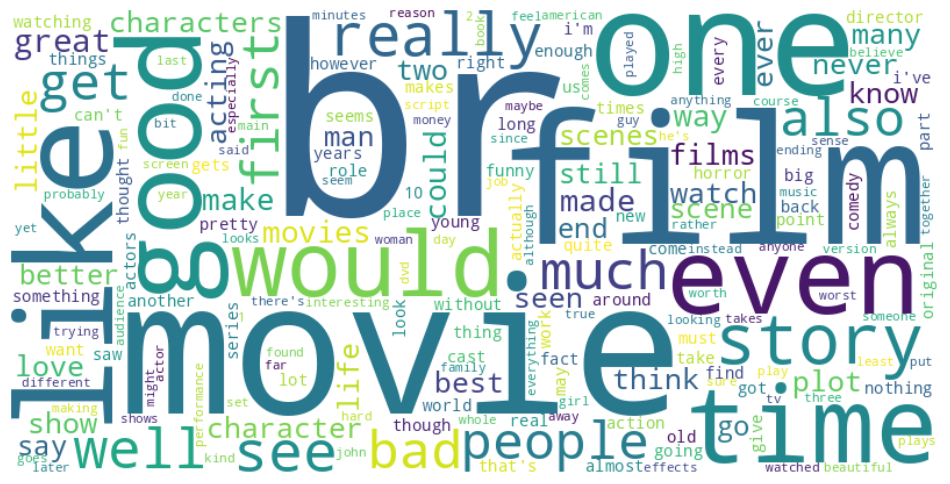

In [13]:
# Create a word cloud from the filtered word frequency dictionary
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_filtered)

# Display the word cloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Ok, so hopefully we understand the dataset enough to know that it is basically
a binary classifier. So, let's prompt to define, train and evaluate a model.

> write a classifer for the imdb dataset

In [16]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
from keras.preprocessing import sequence
from keras import utils as np_utils
from nltk.corpus import stopwords
import string

# Load the dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Get the word index dictionary
word_index = imdb.get_word_index()

# Reverse the word index to map integers to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Define the stop words and punctuation to remove
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Define a function to preprocess a movie review
def preprocess_review(review):
    # Remove stop words and punctuation
    review = [word for word in review if word not in stop_words and word not in punctuation]
    # Map each word to its integer index in the word index dictionary
    review = [word_index.get(word, 0) for word in review]
    return review

# Preprocess the movie reviews
train_data = [preprocess_review(review) for review in train_data]
test_data = [preprocess_review(review) for review in test_data]

# Pad the sequences to a fixed length
train_data = sequence.pad_sequences(train_data, maxlen=500)
test_data = sequence.pad_sequences(test_data, maxlen=500)

# Convert the labels to one-hot encoding
train_labels = np_utils.to_categorical(train_labels)
test_labels = np_utils.to_categorical(test_labels)

# Define the model architecture
model = Sequential()
model.add(Embedding(10000, 32, input_length=500))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=5, batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate(test_data, test_labels)
print('Test accuracy:', accuracy)

Epoch 1/5
391/391 [==============================] - 4s 7ms/step - loss: 0.6959 - accuracy: 0.4958 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
391/391 [==============================] - 2s 6ms/step - loss: 0.6932 - accuracy: 0.5002 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
391/391 [==============================] - 2s 6ms/step - loss: 0.6935 - accuracy: 0.5015 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 4/5
391/391 [==============================] - 2s 6ms/step - loss: 0.6947 - accuracy: 0.5009 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 5/5
782/782 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Test accuracy: 0.5


We can inspect the code that was produced, but in addition we can ask Copilot to
expain it for us by putting the cursor in the code cell above and either 
typing "explain", or clicking in the Copilot chat box and typing `/explain`.

> /explain

GitHub Copilot: This code loads the IMDB dataset using the `imdb.load_data()` function from Keras. It then retrieves the word index dictionary using the `imdb.get_word_index()` function and reverses it to map integers to words.

The code then defines the stop words and punctuation to remove from the movie reviews. It also defines a function to preprocess a movie review by removing stop words and punctuation, and mapping each word to its integer index in the word index dictionary.

The code then preprocesses the movie reviews in the training and testing sets using the `preprocess_review()` function. It pads the sequences to a fixed length of 500 using the `sequence.pad_sequences()` function from Keras. Finally, it converts the labels to one-hot encoding using the `np_utils.to_categorical()` function from Keras.

The code then defines the model architecture using a `Sequential` model from Keras. The model consists of an embedding layer that maps each word index to a 32-dimensional vector, a flatten layer that flattens the output of the embedding layer, and a dense layer with a softmax activation function that outputs a probability distribution over the two classes (positive and negative).

The code then compiles the model using the `compile()` method of the model object. It uses the categorical cross-entropy loss function, the Adam optimizer, and the accuracy metric.

The code then trains the model using the `fit()` method of the model object. It trains the model for 5 epochs with a batch size of 64, and uses the validation data to monitor the performance of the model during training.

Finally, the code evaluates the model using the `evaluate()` method of the model object, and prints the test accuracy.

## Conclusion

We'll leave it there but you may want to explore further, perhaps with prompts
like

> What is the accuracy of the best-performing model on the IMDB dataset?

GitHub Copilot: The accuracy of the best-performing model on the IMDB dataset can vary depending on the specific model architecture and training parameters used. In general, state-of-the-art models can achieve test accuracies of around 95-97% on the IMDB dataset.


> What are some common deep learning models used for sentiment analysis on the IMDB dataset?

GitHub Copilot: There are several common deep learning models used for sentiment analysis on the IMDB dataset, including:

1. Convolutional Neural Networks (CNNs): These models use convolutional layers to extract features from the input sequences, followed by pooling layers to reduce the dimensionality of the feature maps. The resulting features are then fed into one or more fully connected layers to make the final prediction.

2. Recurrent Neural Networks (RNNs): These models use recurrent layers to process the input sequences one element at a time, while maintaining an internal state that captures the context of the sequence seen so far. The final state of the recurrent layer is then fed into one or more fully connected layers to make the final prediction.

3. Long Short-Term Memory (LSTM) Networks: These models are a type of RNN that use special memory cells to capture long-term dependencies in the input sequences. The memory cells can selectively forget or remember information based on the input and the current state, allowing them to handle sequences of varying length and complexity.

4. Gated Recurrent Unit (GRU) Networks: These models are another type of RNN that use a simplified version of the LSTM memory cell, with fewer parameters and gates. They are faster to train and require less memory than LSTMs, while still achieving comparable performance on many tasks.

5. Transformer Networks: These models use self-attention mechanisms to process the input sequences in parallel, without the need for recurrent or convolutional layers. They have achieved state-of-the-art performance on many natural language processing tasks, including sentiment analysis on the IMDB dataset.

## Extra Credit

Try to get Copilot to generate a model that achieves > 90% accuracy on the IMDB.

In [21]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
from keras.preprocessing import sequence
from keras import utils as np_utils
from nltk.corpus import stopwords
import string

# Load the dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Get the word index dictionary
word_index = imdb.get_word_index()

# Reverse the word index to map integers to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Define the stop words and punctuation to remove
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Define a function to preprocess a movie review
def preprocess_review(review):
    # Remove stop words and punctuation
    review = [word for word in review if word not in stop_words and word not in punctuation]
    # Map each word to its integer index in the word index dictionary
    review = [word_index.get(word, 0) for word in review]
    return review

# Preprocess the movie reviews
train_data = [preprocess_review(review) for review in train_data]
test_data = [preprocess_review(review) for review in test_data]

# Pad the sequences to a fixed length
train_data = sequence.pad_sequences(train_data, maxlen=500)
test_data = sequence.pad_sequences(test_data, maxlen=500)

# Convert the labels to one-hot encoding
train_labels = np_utils.to_categorical(train_labels)
test_labels = np_utils.to_categorical(test_labels)

# Define the model architecture
model = Sequential()
model.add(Embedding(10000, 32, input_length=500))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=15)

# Evaluate the model
loss, accuracy = model.evaluate(test_data, test_labels)
print('Test accuracy:', accuracy)

Epoch 1/15
782/782 [==============================] - 4s 5ms/step - loss: 0.6946 - accuracy: 0.4973 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/15
782/782 [==============================] - 4s 5ms/step - loss: 0.6940 - accuracy: 0.5027 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/15
782/782 [==============================] - 4s 5ms/step - loss: 0.6941 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/15
782/782 [==============================] - 4s 5ms/step - loss: 0.6939 - accuracy: 0.5031 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/15
782/782 [==============================] - 4s 5ms/step - loss: 0.6937 - accuracy: 0.4958 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/15
782/782 [==============================] - 4s 5ms/step - loss: 0.6947 - accuracy: 0.4994 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 7/15
782/782 [==============================] - 4s 5ms/step - loss: 0.6940 - accuracy: 0.4993 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 